  # **CUSTOMER CHURN PREDICTION**

**Importing all** **required** **libraries**

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn import svm

**Reading the dataset**

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.dtypes #checking data types of columns

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
remove_col = ['RowNumber','CustomerId','Surname'] #removing unwanted columns
df1 = df.drop(remove_col, axis = 1)

In [ ]:
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**Data visualization**

*Bar graph plotting Tenure v Churn*

Text(0.5, 1.0, 'Tenure v Churn')

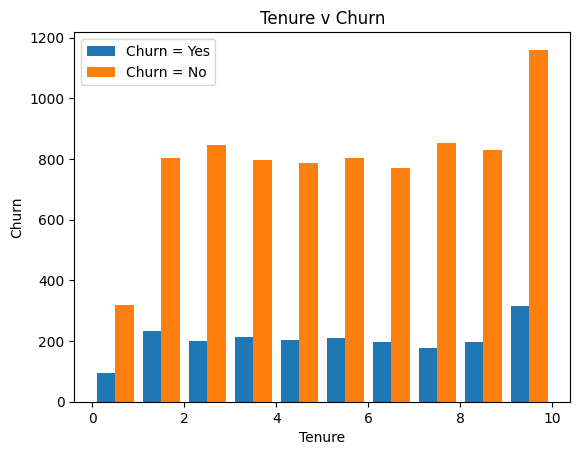

In [ ]:
tenure_churn_no = df1[df1.Exited == 0].Tenure
tenure_churn_yes = df1[df1.Exited == 1].Tenure

plt.hist([tenure_churn_yes,tenure_churn_no], label=['Churn = Yes', 'Churn = No'])
plt.xlabel("Tenure")
plt.ylabel("Churn")
plt.legend()
plt.title("Tenure v Churn")

*Bar graph plotting Credit score v Churn*

Text(0.5, 1.0, 'Credit Score v Churn')

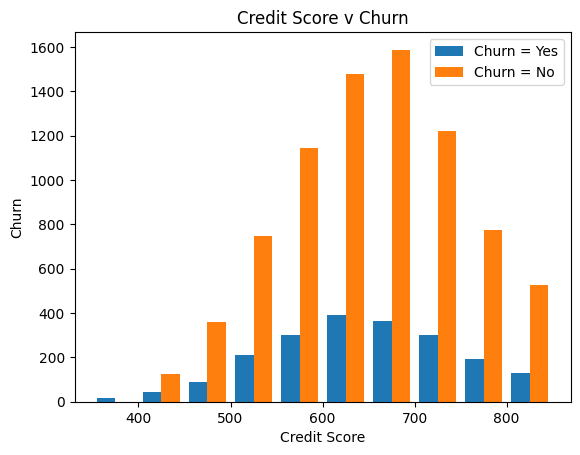

In [ ]:
credscore_churn_no = df1[df1.Exited == 0].CreditScore
credscore_churn_yes = df1[df1.Exited == 1].CreditScore

plt.hist([credscore_churn_yes,credscore_churn_no], label=['Churn = Yes', 'Churn = No'])
plt.xlabel("Credit Score")
plt.ylabel("Churn")
plt.legend()
plt.title("Credit Score v Churn")



*Bar graph plotting amount of Male customers v Churn*

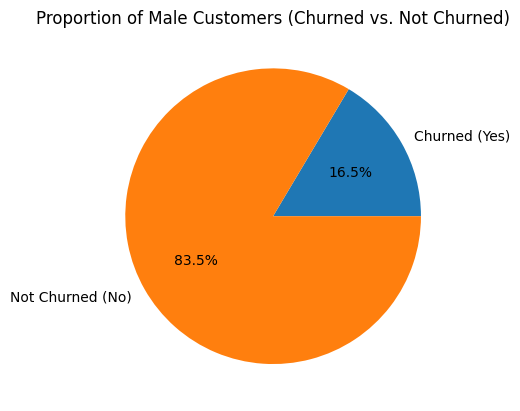

In [ ]:
male_churned_yes = df1[(df1['Exited'] == 1) & (df1['Gender'] == 'Male')].shape[0]
male_churned_no = df1[(df1['Exited'] == 0) & (df1['Gender'] == 'Male')].shape[0]

total_male_customers = male_churned_yes + male_churned_no
proportion_churned = (male_churned_yes / total_male_customers) * 100
proportion_not_churned = (male_churned_no / total_male_customers) * 100

pie_chart_labels = ['Churned (Yes)', 'Not Churned (No)']

# Create the pie chart
plt.pie([proportion_churned, proportion_not_churned], labels=pie_chart_labels, autopct="%1.1f%%")  # Adjust for one decimal place
plt.title("Proportion of Male Customers (Churned vs. Not Churned)")
plt.show()

*Bar graph plotting amount of Female customers v Churn*

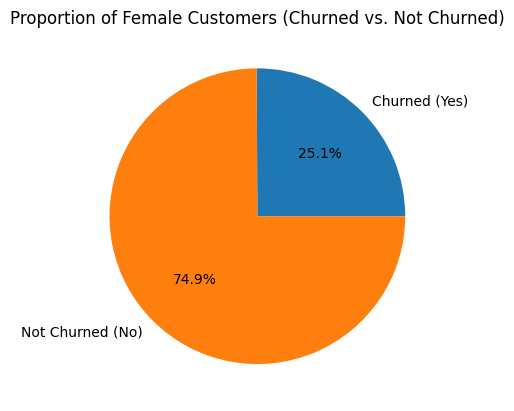

In [ ]:
female_churned_yes = df1[(df1['Exited'] == 1) & (df1['Gender'] == 'Female')].shape[0]
female_churned_no = df1[(df1['Exited'] == 0) & (df1['Gender'] == 'Female')].shape[0]

total_female_customers = female_churned_yes + female_churned_no
proportion_churned = (female_churned_yes / total_female_customers) * 100
proportion_not_churned = (female_churned_no / total_female_customers) * 100

pie_chart_labels = ['Churned (Yes)', 'Not Churned (No)']

# Create the pie chart
plt.pie([proportion_churned, proportion_not_churned], labels=pie_chart_labels, autopct="%1.1f%%")  # Adjust for one decimal place
plt.title("Proportion of Female Customers (Churned vs. Not Churned)")
plt.show()

In [ ]:
df[df.isna()].count() #checking for null values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**One hot Encodding non numerical columns**

In [ ]:
df_dum = pd.get_dummies(df1,columns=['Geography','Gender'],dtype=int)

In [ ]:
df_dum.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [ ]:
df2 = df_dum.copy()

**Scaling or normalizing all column values to similar range**

In [ ]:
col_to_scale = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
scaler = MinMaxScaler()
df2[col_to_scale] = scaler.fit_transform(df2[col_to_scale])

In [ ]:
df2.head() #dataset for training

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1,1,0


In [ ]:
X = df2.drop('Exited',axis = 1) #input set

In [ ]:
Y = df2['Exited'] #output set

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) #splitting dataset fot testing and training

**Model training and prediction**

*Logistic regression*

In [ ]:
lr_model = LogisticRegression() #calling logistic regression model

In [ ]:
lr_model.fit(X_train, Y_train) #training data

LogisticRegression()

In [ ]:
y_pred = lr_model.predict(X_test) #doing prediction on test data set

In [ ]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
print(f' Logistic Regression report\n{classification_report(Y_test,y_pred)}') #evaluation report

 Logistic Regression report
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1599
           1       0.62      0.20      0.30       401

    accuracy                           0.81      2000
   macro avg       0.72      0.59      0.60      2000
weighted avg       0.79      0.81      0.78      2000



*Random Forest model*

In [ ]:
# Define and train the Random Forest model
rf_model = RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)
rf_model.fit(X_train, Y_train)

# Make predictions on the testing set
y_pred_rf = rf_model.predict(X_test)


print(f' Random Forest report\n{classification_report(Y_test,y_pred_rf)}')

 Random Forest report
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1599
           1       0.84      0.39      0.54       401

    accuracy                           0.86      2000
   macro avg       0.86      0.69      0.73      2000
weighted avg       0.86      0.86      0.84      2000



*Gradient Boost model*

In [ ]:
# Define and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(learning_rate=0.2, n_estimators=100, random_state=42)
gb_model.fit(X_train, Y_train)

# Make predictions on the testing set
y_pred_gb = gb_model.predict(X_test)

print(f' Gradient boost report\n{classification_report(Y_test,y_pred_gb)}')



 Gradient boost report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1599
           1       0.76      0.46      0.58       401

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



*Support Vector Classifier*

In [ ]:
clf = svm.SVC()
clf.fit(X_train, Y_train)
y_pred_svc = clf.predict(X_test)

print(f' SVM report\n{classification_report(Y_test,y_pred_svc)}')


 SVM report
              precision    recall  f1-score   support

           0       0.83      0.99      0.91      1599
           1       0.84      0.22      0.35       401

    accuracy                           0.83      2000
   macro avg       0.84      0.60      0.63      2000
weighted avg       0.84      0.83      0.79      2000



**Hyperparameter tuning using GridSearchCV to optimize model performance**

In [ ]:
# Define hyperparameter grids for each model (we can adjust as needed)
rf_param_grid = {
    'max_depth': [4, 6, 8],
    'n_estimators': [100, 200, 300],
    'random_state': [42]  # Keep random state consistent for reproducibility
}

gb_param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 150],
    'random_state': [42]
}

logreg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # Consider different solvers for LogisticRegression
}

# Create GridSearchCV instances for each model
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='accuracy')
gb_grid_search = GridSearchCV(GradientBoostingClassifier(), gb_param_grid, cv=5, scoring='accuracy')
logreg_grid_search = GridSearchCV(LogisticRegression(), logreg_param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV instances to the training data
rf_grid_search.fit(X_train, Y_train)
gb_grid_search.fit(X_train, Y_train)
logreg_grid_search.fit(X_train, Y_train)

# Print the best parameters and scores for each model
print("Random Forest Best Parameters:", rf_grid_search.best_params_)
print("Random Forest Best Score:", rf_grid_search.best_score_)

print("Gradient Boosting Best Parameters:", gb_grid_search.best_params_)
print("Gradient Boosting Best Score:", gb_grid_search.best_score_)

print("Logistic Regression Best Parameters:", logreg_grid_search.best_params_)
print("Logistic Regression Best Score:", logreg_grid_search.best_score_)

# Use the best models from GridSearchCV for predictions
best_rf_model = rf_grid_search.best_estimator_
best_gb_model = gb_grid_search.best_estimator_
best_logreg_model = logreg_grid_search.best_estimator_

y_pred_rf = best_rf_model.predict(X_test)
y_pred_gb = best_gb_model.predict(X_test)
y_pred_logreg = best_logreg_model.predict(X_test)

# Evaluate the performance of the best models (replace with your preferred metrics)
print(f' Random Forest report\n{classification_report(Y_test,y_pred_rf)}')
print(f' Gradient Boosting report\n{classification_report(Y_test,y_pred_gb)}')
print(f' Logistic Regression report\n{classification_report(Y_test,y_pred_logreg)}')


Random Forest Best Parameters: {'max_depth': 8, 'n_estimators': 300, 'random_state': 42}
Random Forest Best Score: 0.8612500000000001
Gradient Boosting Best Parameters: {'learning_rate': 0.2, 'n_estimators': 50, 'random_state': 42}
Gradient Boosting Best Score: 0.865875
Logistic Regression Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Best Score: 0.811625
 Random Forest report
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1599
           1       0.84      0.40      0.55       401

    accuracy                           0.86      2000
   macro avg       0.85      0.69      0.73      2000
weighted avg       0.86      0.86      0.85      2000

 Gradient Boosting report
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1599
           1       0.77      0.46      0.58       401

    accuracy                           0.86      2000
   macr

### All models give almost same accuracy scores(around 85%) and other metrics of evaluation, so we can conclude that all these models performs well
